1. Agrégation de modèles
Question 1 : Si 
p
=
0.7
p=0.7 et 
L
=
1
,
5
,
10
,
50
,
100
L=1,5,10,50,100, quelle est la probabilité de prédiction correcte pour le modèle agrégé ? Pour 
L
=
10
L=10, tracez les probabilités de classification correcte pour chaque nombre de classifieurs de 1 à 10.

Réponse :

La probabilité de prédiction correcte pour un modèle agrégé avec 
L
L classifieurs suit une distribution binomiale 
Binomial
(
L
,
p
)
Binomial(L,p). Pour un vote majoritaire, la prédiction est correcte si plus de la moitié des classifieurs prédisent correctement.

Pour 
p=0.7
p=0.7, la probabilité de prédiction correcte pour 
L
=
1
,
5
,
10
,
50
,
100
L=1,5,10,50,100 peut être calculée en utilisant la fonction de survie de la distribution binomiale (c'est-à-dire la probabilité que plus de la moitié des classifieurs soient corrects).

Pour 
L
=
10
L=10, tu peux utiliser scipy.stats.binom pour calculer la probabilité de prédiction correcte pour chaque 
L
L de 1 à 10 et tracer ces probabilités.

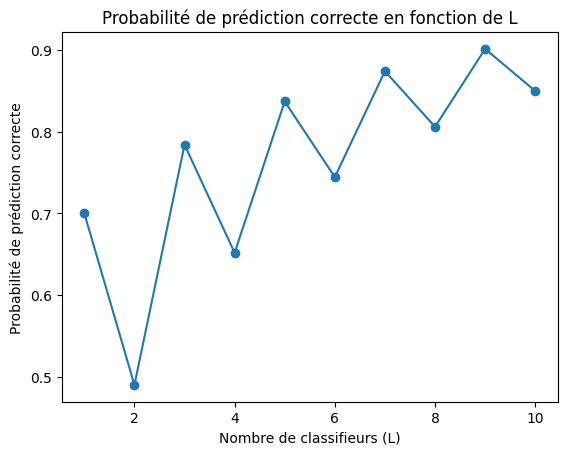

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt

p = 0.7
L_values = range(1, 11)
prob_correct = [1 - binom.cdf(L//2, L, p) for L in L_values]

plt.plot(L_values, prob_correct, marker='o')
plt.xlabel('Nombre de classifieurs (L)')
plt.ylabel('Probabilité de prédiction correcte')
plt.title('Probabilité de prédiction correcte en fonction de L')
plt.show()

2. Bagging
Question 2 : Mettez en œuvre le Bagging avec des arbres de régression de profondeur 1 (stumps), puis avec des arbres plus profonds.

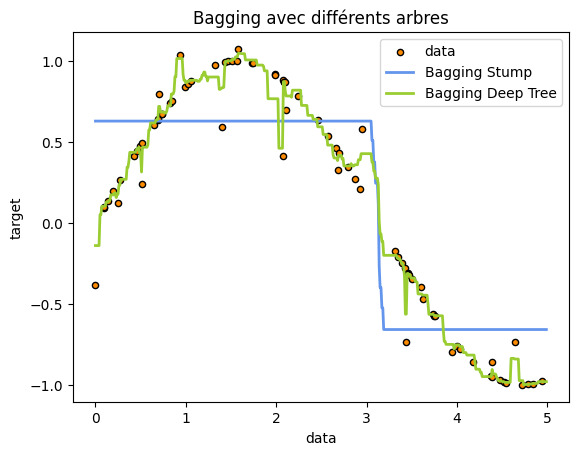

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Créer un jeu de données aléatoire
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

# Bagging avec des stumps
stump = DecisionTreeRegressor(max_depth=1)
bagging_stump = BaggingRegressor(stump, n_estimators=10, random_state=1)
bagging_stump.fit(X, y)

# Bagging avec des arbres plus profonds
deep_tree = DecisionTreeRegressor(max_depth=10)
bagging_deep = BaggingRegressor(deep_tree, n_estimators=10, random_state=1)
bagging_deep.fit(X, y)

# Prédictions
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred_stump = bagging_stump.predict(X_test)
y_pred_deep = bagging_deep.predict(X_test)

# Tracer les résultats
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_stump, color="cornflowerblue", label="Bagging Stump", linewidth=2)
plt.plot(X_test, y_pred_deep, color="yellowgreen", label="Bagging Deep Tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Bagging avec différents arbres")
plt.legend()
plt.show()

Question 3 : Illustrer graphiquement le rôle de 
L
L et de la profondeur des arbres (max_depth).

Réponse :

Tu peux varier n_estimators (nombre de classifieurs 
L
L) et max_depth (profondeur des arbres) pour voir comment ces paramètres affectent les performances du modèle.

Trace les prédictions pour différentes valeurs de 
L
L et max_depth pour voir comment la variance et le biais changent.

Question 4 : À quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance ?

Réponse :

Les arbres de décision ont tendance à avoir une variance élevée et un faible biais, surtout lorsqu'ils sont profonds. Le bagging réduit la variance en moyennant les prédictions de plusieurs arbres, ce qui stabilise le modèle.

Tu peux observer cela en comparant les prédictions d'un seul arbre avec celles d'un ensemble d'arbres (bagging). Les prédictions du bagging seront moins sensibles aux variations des données d'entraînement.

Question 5 : En jouant sur le niveau de bruit, mettez en évidence le sur-apprentissage.

Réponse :

Ajoute du bruit aux données et observe comment les modèles se comportent. Les arbres profonds auront tendance à sur-apprendre (c'est-à-dire à bien performer sur les données d'entraînement mais moins bien sur les données de test), tandis que le bagging réduira ce phénomène.

Question 6 : Observer qu'on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap.

Réponse :

Au lieu d'utiliser le bootstrap (échantillonnage avec remise), tu peux sous-échantillonner sans remise. Cela réduit la corrélation entre les arbres et peut réduire le sur-apprentissage.

3. Random Forest
Question 7 : Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez les performances avec celles d'un SVM linéaire.

Réponse :

Utilise RandomForestRegressor et RandomForestClassifier pour les datasets de régression et de classification respectivement. Compare les scores avec un SVM linéaire (SVC ou LinearSVC).

In [1]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits

# Charger les datasets
boston = load_boston()
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Random Forest
rf_regressor = RandomForestRegressor(random_state=1)
rf_classifier = RandomForestClassifier(random_state=1)

# SVM
svm_regressor = SVC(kernel='linear')
svm_classifier = SVC(kernel='linear')

# Évaluation par cross-validation
datasets = [boston, diabetes, iris, digits]
models = [rf_regressor, rf_regressor, rf_classifier, rf_classifier]
svm_models = [svm_regressor, svm_regressor, svm_classifier, svm_classifier]


for i, dataset in enumerate(datasets):
    X, y = dataset.data, dataset.target
    rf_score = cross_val_score(models[i], X, y, cv=7).mean()
    svm_score = cross_val_score(svm_models[i], X, y, cv=7).mean()
    print(f"Dataset: {dataset.__class__.__name__}, RF Score: {rf_score}, SVM Score: {svm_score}")
    




ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
